In [1]:
# Loading the necessary packages
#Problem 1
#Wholesale Customers Analysis (Download Data)
# Problem Statement:
#A wholesale distributor operating in different regions of Portugal has information on annual spending of several items 
#in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 
#different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel(Hotel, Retail).
#1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more?
#Which Region and which Channel seems to spend less?


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import math
from scipy import stats
from scipy.stats import   ttest_1samp, ttest_ind



In [2]:
# Loading the data set
df = pd.read_csv('Wholesale Customer.csv')
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [3]:
df.shape

(440, 9)

In [4]:
df.size

3960

In [5]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [7]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [10]:
df.isnull().values.any()

False

In [11]:
df['Total Expenditure'] = df['Fresh'] + df['Milk']+ df['Grocery']+ df['Frozen']+ df['Detergents_Paper']+ df['Delicatessen']

df


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Expenditure
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [12]:
df['Channel'].value_counts()

# There are 298 belonging to Hotel and 142 belonging to Retail in 'Channel' attribute

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [13]:
df['Region'].value_counts()

# There are 316 records belonging to Other, 77 belonging to Lisbon and 47 in Oporto in 'Region' attribute


Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [14]:
df.groupby('Channel')['Total Expenditure'].sum()

# The Channel, 'Hotel' seems to be spending more and Retail is spending less. 

Channel
Hotel     7999569
Retail    6619931
Name: Total Expenditure, dtype: int64

In [15]:
df.groupby('Region')['Total Expenditure'].sum()

# The Region ,'Other' seems to be spending more and 'Oporto' seems to be spending less.

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total Expenditure, dtype: int64

In [16]:
round(df.groupby('Channel')['Fresh'].mean(),2)

Channel
Hotel     13475.56
Retail     8904.32
Name: Fresh, dtype: float64

In [17]:
df.groupby('Channel')['Fresh'].median()

Channel
Hotel     9581.5
Retail    5993.5
Name: Fresh, dtype: float64

<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

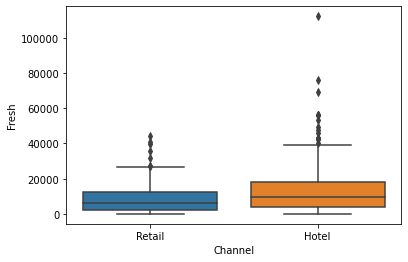

In [18]:
sns.boxplot(x="Channel", y="Fresh", data=df)

In [19]:
round(df.groupby('Channel')['Milk'].mean(),2)

Channel
Hotel      3451.72
Retail    10716.50
Name: Milk, dtype: float64

In [20]:
df.groupby('Channel')['Milk'].median()

Channel
Hotel     2157
Retail    7812
Name: Milk, dtype: int64

<AxesSubplot:xlabel='Channel', ylabel='Milk'>

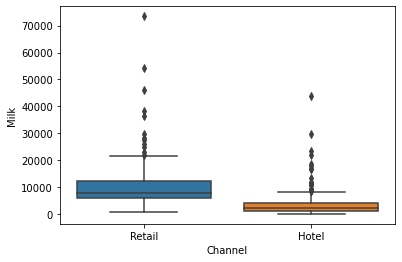

In [21]:
sns.boxplot(x="Channel", y="Milk", data=df)

In [22]:
round(df.groupby('Channel')['Grocery'].mean(),2)

Channel
Hotel      3962.14
Retail    16322.85
Name: Grocery, dtype: float64

In [23]:
df.groupby('Channel')['Grocery'].median()

Channel
Hotel      2684
Retail    12390
Name: Grocery, dtype: int64

<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

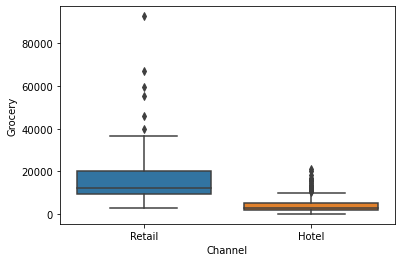

In [24]:
sns.boxplot(x="Channel", y="Grocery", data=df)

In [25]:
round(df.groupby('Channel')['Frozen'].mean(),2)

Channel
Hotel     3748.25
Retail    1652.61
Name: Frozen, dtype: float64

In [26]:
df.groupby('Channel')['Frozen'].median()

Channel
Hotel     2057.5
Retail    1081.0
Name: Frozen, dtype: float64

<AxesSubplot:xlabel='Channel', ylabel='Frozen'>

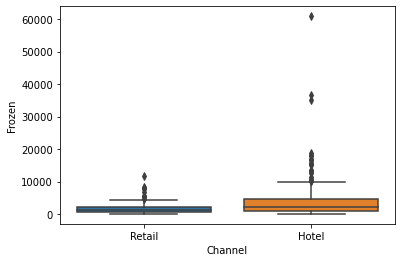

In [27]:
sns.boxplot(x="Channel", y="Frozen", data=df)

In [28]:
round(df.groupby('Channel')['Detergents_Paper'].mean(),2)

Channel
Hotel      790.56
Retail    7269.51
Name: Detergents_Paper, dtype: float64

In [29]:
df.groupby('Channel')['Detergents_Paper'].median()

Channel
Hotel      385.5
Retail    5614.5
Name: Detergents_Paper, dtype: float64

<AxesSubplot:xlabel='Channel', ylabel='Detergents_Paper'>

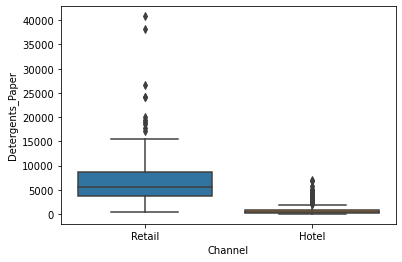

In [30]:
sns.boxplot(x="Channel", y="Detergents_Paper", data=df)

In [31]:
round(df.groupby('Channel')['Delicatessen'].mean(),2)

Channel
Hotel     1415.96
Retail    1753.44
Name: Delicatessen, dtype: float64

In [32]:
df.groupby('Channel')['Delicatessen'].median()

Channel
Hotel      821
Retail    1350
Name: Delicatessen, dtype: int64

<AxesSubplot:xlabel='Channel', ylabel='Delicatessen'>

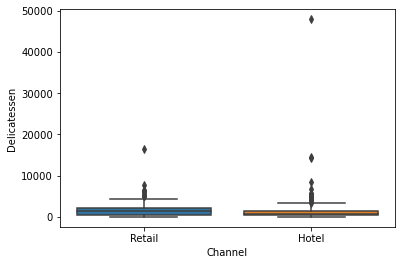

In [33]:
sns.boxplot(x="Channel", y="Delicatessen", data=df)

In [34]:
round(df.groupby('Region')['Fresh'].mean(),2)

Region
Lisbon    11101.73
Oporto     9887.68
Other     12533.47
Name: Fresh, dtype: float64

In [35]:
df.groupby('Region')['Fresh'].median()

Region
Lisbon    7363.0
Oporto    8090.0
Other     8752.5
Name: Fresh, dtype: float64

<AxesSubplot:xlabel='Region', ylabel='Fresh'>

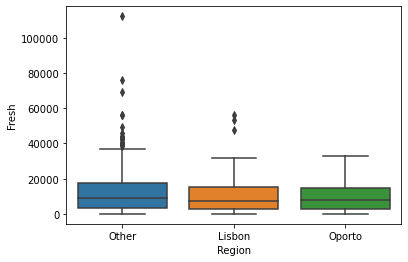

In [36]:
sns.boxplot(x="Region", y="Fresh", data=df)

In [37]:
round(df.groupby('Region')['Milk'].mean(),2)

Region
Lisbon    5486.42
Oporto    5088.17
Other     5977.09
Name: Milk, dtype: float64

In [38]:
df.groupby('Region')['Milk'].median()

Region
Lisbon    3748.0
Oporto    2374.0
Other     3684.5
Name: Milk, dtype: float64

<AxesSubplot:xlabel='Region', ylabel='Milk'>

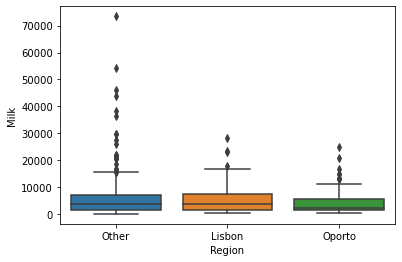

In [39]:
sns.boxplot(x="Region", y="Milk", data=df)

In [40]:
round(df.groupby('Region')['Grocery'].mean(),2)

Region
Lisbon    7403.08
Oporto    9218.60
Other     7896.36
Name: Grocery, dtype: float64

In [41]:
df.groupby('Region')['Grocery'].median()

Region
Lisbon    3838
Oporto    6114
Other     4732
Name: Grocery, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Grocery'>

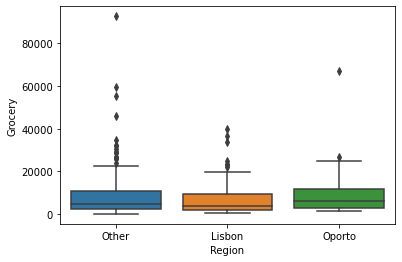

In [42]:
sns.boxplot(x="Region", y="Grocery", data=df)

In [43]:
round(df.groupby('Region')['Frozen'].mean(), 2)

Region
Lisbon    3000.34
Oporto    4045.36
Other     2944.59
Name: Frozen, dtype: float64

In [44]:
df.groupby('Region')['Frozen'].median()

Region
Lisbon    1801
Oporto    1455
Other     1498
Name: Frozen, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Frozen'>

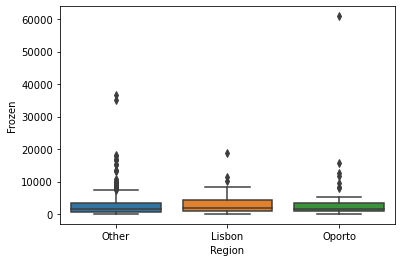

In [45]:
sns.boxplot(x="Region", y="Frozen", data=df)

In [46]:
round(df.groupby('Region')['Detergents_Paper'].mean(), 2)

Region
Lisbon    2651.12
Oporto    3687.47
Other     2817.75
Name: Detergents_Paper, dtype: float64

In [47]:
df.groupby('Region')['Detergents_Paper'].median()

Region
Lisbon    737
Oporto    811
Other     856
Name: Detergents_Paper, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Detergents_Paper'>

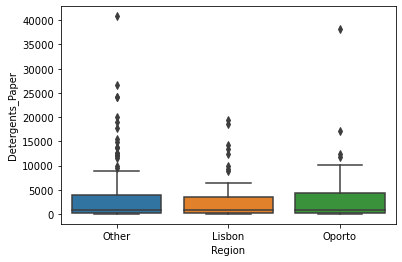

In [48]:
sns.boxplot(x="Region", y="Detergents_Paper", data=df)

In [49]:
round(df.groupby('Region')['Delicatessen'].mean(), 2)

Region
Lisbon    1354.9
Oporto    1159.7
Other     1620.6
Name: Delicatessen, dtype: float64

In [50]:
df.groupby('Region')['Delicatessen'].median()

Region
Lisbon    806
Oporto    898
Other     994
Name: Delicatessen, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Delicatessen'>

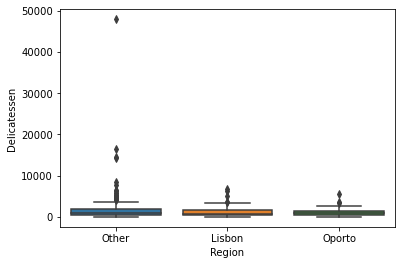

In [51]:
sns.boxplot(x="Region", y="Delicatessen", data=df)

In [52]:
round(df.groupby('Channel')['Fresh'].std()/df.groupby('Channel')['Fresh'].mean() * 100,  2)

Channel
Hotel     102.64
Retail    100.94
Name: Fresh, dtype: float64

In [53]:
round(df.groupby('Region')['Fresh'].std()/df.groupby('Region')['Fresh'].mean() * 100,  2)

Region
Lisbon    104.10
Oporto     84.83
Other     106.83
Name: Fresh, dtype: float64

In [54]:
round(df.groupby('Channel')['Milk'].std()/df.groupby('Channel')['Milk'].mean() * 100,  2)

Channel
Hotel     126.09
Retail     90.32
Name: Milk, dtype: float64

In [55]:
round(df.groupby('Region')['Milk'].std()/df.groupby('Region')['Milk'].mean() * 100,  2)

Region
Lisbon    103.98
Oporto    114.51
Other     132.76
Name: Milk, dtype: float64

In [56]:
round(df.groupby('Channel')['Grocery'].std()/df.groupby('Channel')['Grocery'].mean() * 100,  2)

Channel
Hotel     89.48
Retail    75.15
Name: Grocery, dtype: float64

In [57]:
round(df.groupby('Region')['Grocery'].std()/df.groupby('Region')['Grocery'].mean() * 100,  2)

Region
Lisbon    114.77
Oporto    117.62
Other     120.78
Name: Grocery, dtype: float64

In [58]:
round(df.groupby('Channel')['Frozen'].std()/df.groupby('Channel')['Frozen'].mean() * 100,  2)

Channel
Hotel     150.57
Retail    109.69
Name: Frozen, dtype: float64

In [59]:
round(df.groupby('Region')['Frozen'].std()/df.groupby('Region')['Frozen'].mean() * 100,  2)

Region
Lisbon    103.06
Oporto    226.23
Other     144.68
Name: Frozen, dtype: float64

In [60]:
round(df.groupby('Channel')['Detergents_Paper'].std()/df.groupby('Channel')['Detergents_Paper'].mean() * 100,  2)

Channel
Hotel     139.66
Retail     86.54
Name: Detergents_Paper, dtype: float64

In [61]:
round(df.groupby('Region')['Detergents_Paper'].std()/df.groupby('Region')['Detergents_Paper'].mean() * 100,  2)

Region
Lisbon    158.74
Oporto    176.67
Other     163.00
Name: Detergents_Paper, dtype: float64

In [62]:
round(df.groupby('Channel')['Delicatessen'].std()/df.groupby('Channel')['Delicatessen'].mean() * 100,  2)

Channel
Hotel     222.28
Retail    111.43
Name: Delicatessen, dtype: float64

In [63]:
round(df.groupby('Region')['Delicatessen'].std()/df.groupby('Region')['Delicatessen'].mean() * 100,  2)

Region
Lisbon     99.30
Oporto     90.60
Other     199.47
Name: Delicatessen, dtype: float64

In [64]:
#1.3	On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour?
# Which items show the least inconsistent behaviour?

round(df['Fresh'].std()/df['Fresh'].mean() * 100,2)

105.39

In [65]:
round(df['Milk'].std()/df['Milk'].mean() * 100,2)

127.33

In [66]:
round(df['Grocery'].std()/df['Grocery'].mean() * 100,2)

119.52

In [67]:
round(df['Frozen'].std()/df['Frozen'].mean() * 100,2)

158.03

In [68]:
round(df['Detergents_Paper'].std()/df['Detergents_Paper'].mean() * 100,2)

165.46

In [69]:
round(df['Delicatessen'].std()/df['Delicatessen'].mean() * 100,2)

184.94

In [70]:
dfcopy = df.copy()
dfcopy = dfcopy.drop('Buyer/Spender', axis = 1)


In [71]:
dfcopy

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Expenditure
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


<AxesSubplot:>

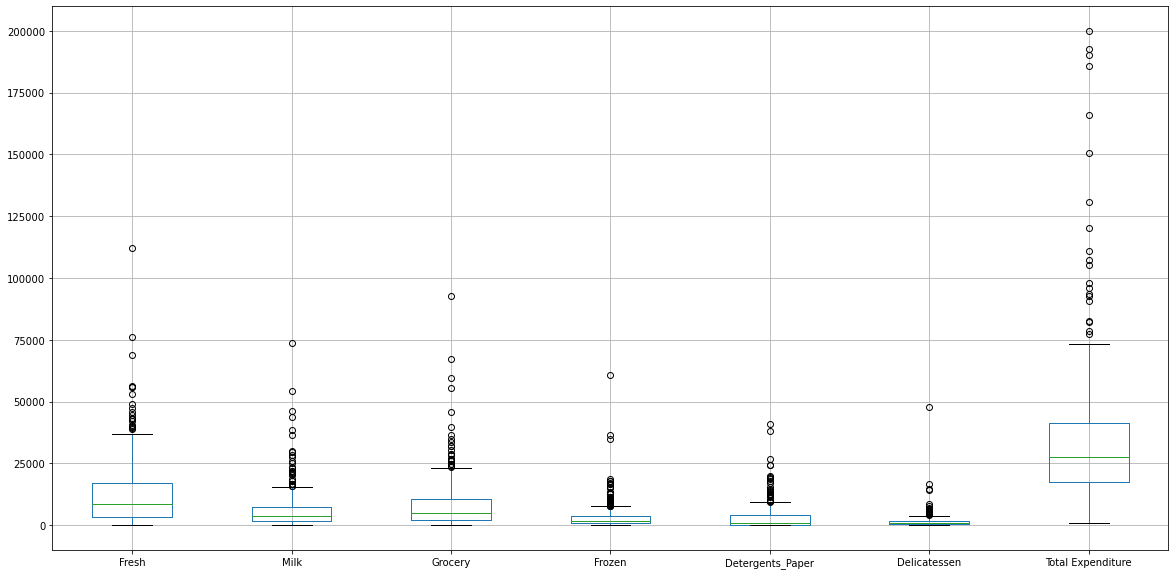

In [72]:
dfcopy.boxplot(figsize=(20,10))

Hotel          AxesSubplot(0.1,0.15;0.363636x0.75)
Retail    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

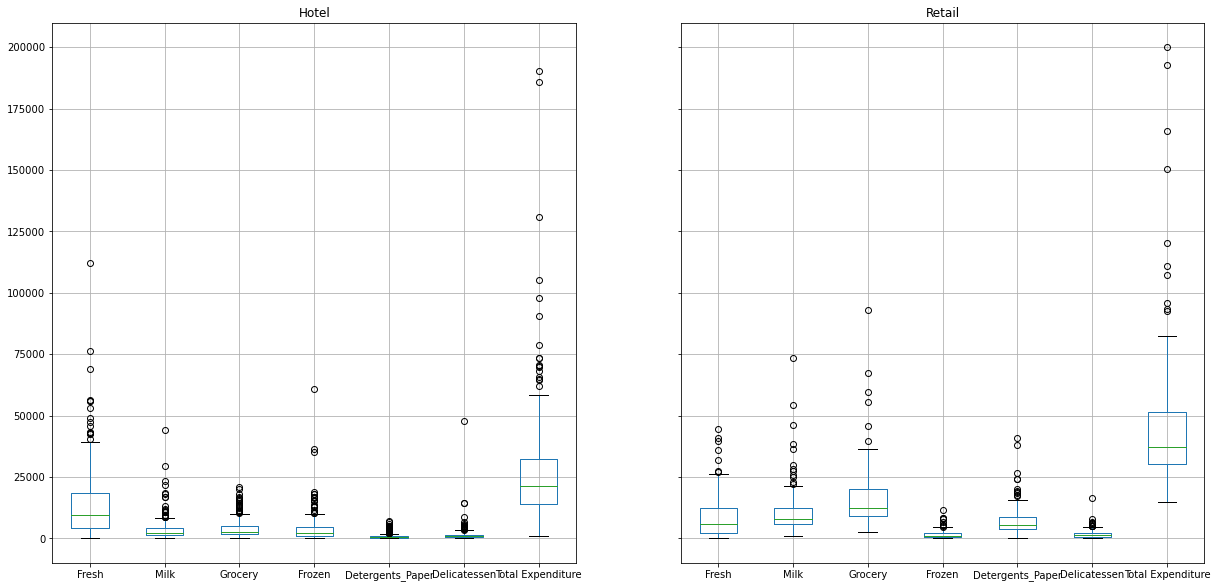

In [73]:
dfcopy.groupby('Channel').boxplot(figsize=(20,10))

Lisbon         AxesSubplot(0.1,0.559091;0.363636x0.340909)
Oporto    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Other              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

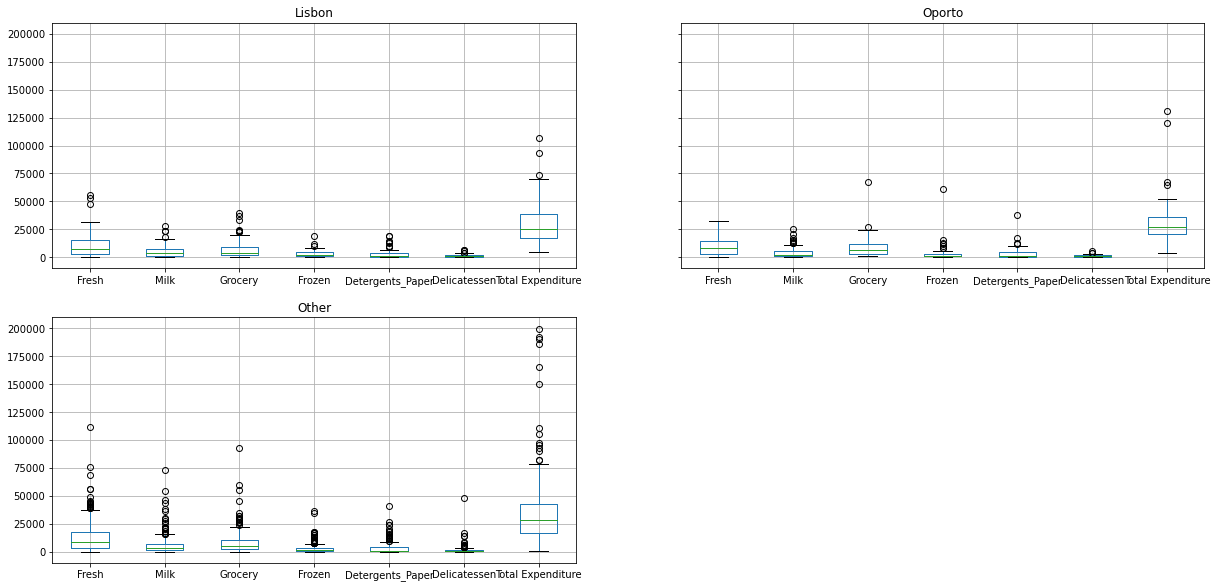

In [74]:
dfcopy.groupby('Region').boxplot(figsize=(20,10))

array([<AxesSubplot:title={'center':'Hotel'}>,
       <AxesSubplot:title={'center':'Retail'}>], dtype=object)

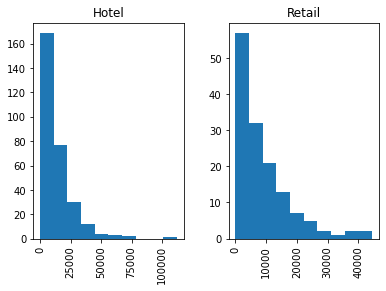

In [75]:
df.hist(by='Channel',column = 'Fresh')


array([[<AxesSubplot:title={'center':'Lisbon'}>,
        <AxesSubplot:title={'center':'Oporto'}>],
       [<AxesSubplot:title={'center':'Other'}>, <AxesSubplot:>]],
      dtype=object)

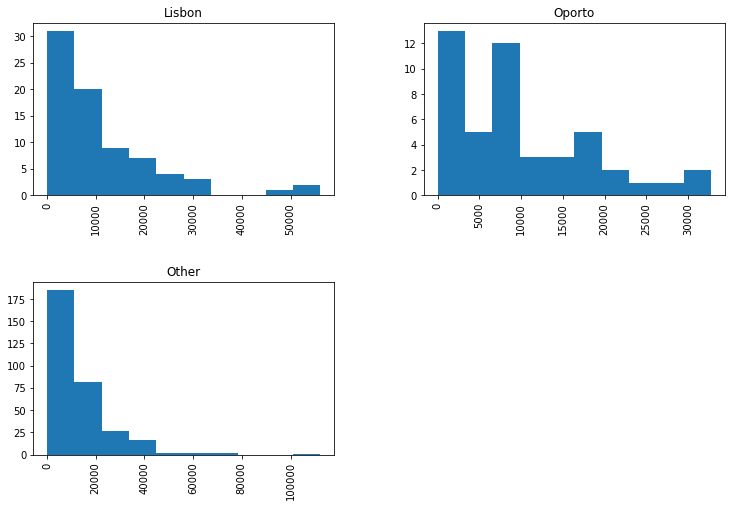

In [76]:
df.hist(by='Region',column = 'Fresh',figsize=(12,8))

array([<AxesSubplot:title={'center':'Hotel'}>,
       <AxesSubplot:title={'center':'Retail'}>], dtype=object)

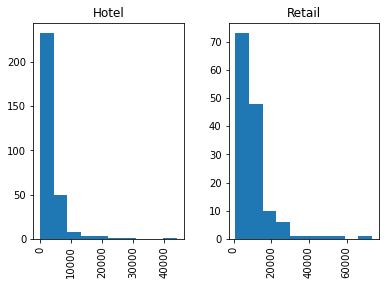

In [77]:
df.hist(by='Channel',column = 'Milk')

array([[<AxesSubplot:title={'center':'Lisbon'}>,
        <AxesSubplot:title={'center':'Oporto'}>],
       [<AxesSubplot:title={'center':'Other'}>, <AxesSubplot:>]],
      dtype=object)

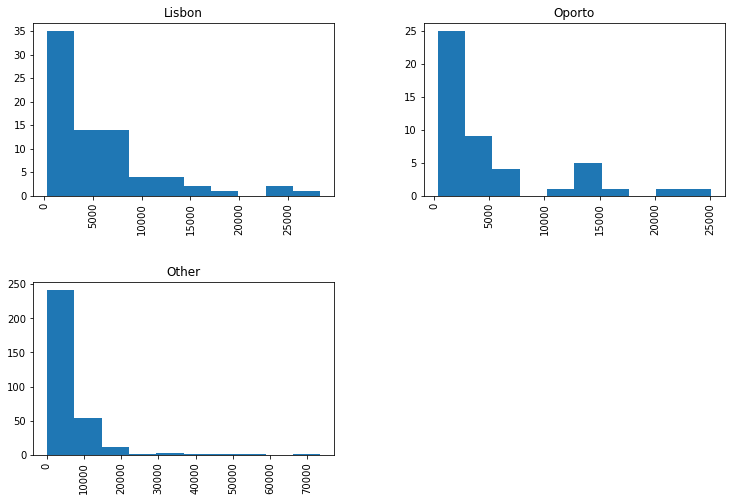

In [78]:
df.hist(by='Region',column = 'Milk',figsize=(12,8))

array([<AxesSubplot:title={'center':'Hotel'}>,
       <AxesSubplot:title={'center':'Retail'}>], dtype=object)

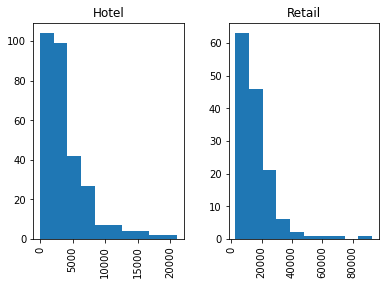

In [79]:
df.hist(by='Channel',column = 'Grocery')

array([[<AxesSubplot:title={'center':'Lisbon'}>,
        <AxesSubplot:title={'center':'Oporto'}>],
       [<AxesSubplot:title={'center':'Other'}>, <AxesSubplot:>]],
      dtype=object)

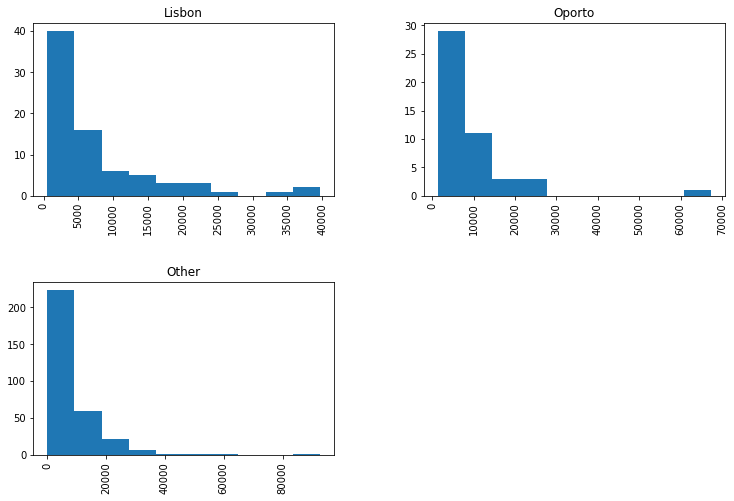

In [80]:
df.hist(by='Region',column = 'Grocery',figsize=(12,8))

array([<AxesSubplot:title={'center':'Hotel'}>,
       <AxesSubplot:title={'center':'Retail'}>], dtype=object)

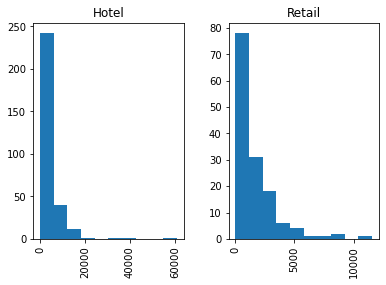

In [81]:
df.hist(by='Channel',column = 'Frozen')

array([[<AxesSubplot:title={'center':'Lisbon'}>,
        <AxesSubplot:title={'center':'Oporto'}>],
       [<AxesSubplot:title={'center':'Other'}>, <AxesSubplot:>]],
      dtype=object)

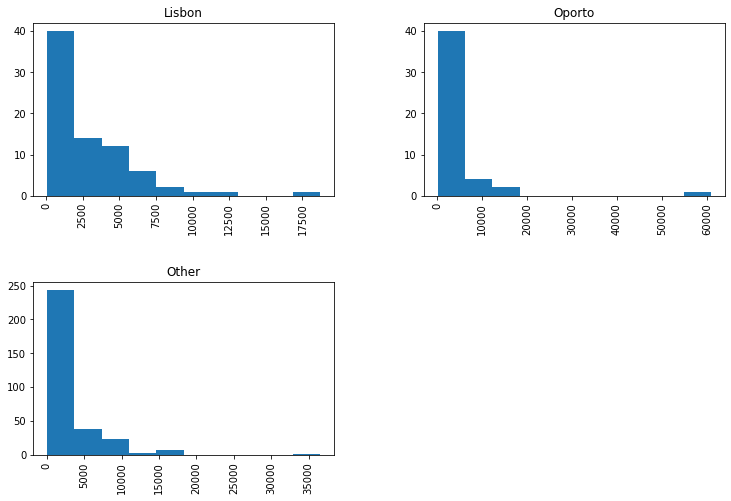

In [82]:
df.hist(by='Region',column = 'Frozen',figsize=(12,8))

array([<AxesSubplot:title={'center':'Hotel'}>,
       <AxesSubplot:title={'center':'Retail'}>], dtype=object)

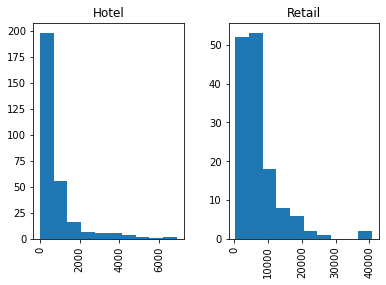

In [83]:
df.hist(by='Channel',column = 'Detergents_Paper')

array([[<AxesSubplot:title={'center':'Lisbon'}>,
        <AxesSubplot:title={'center':'Oporto'}>],
       [<AxesSubplot:title={'center':'Other'}>, <AxesSubplot:>]],
      dtype=object)

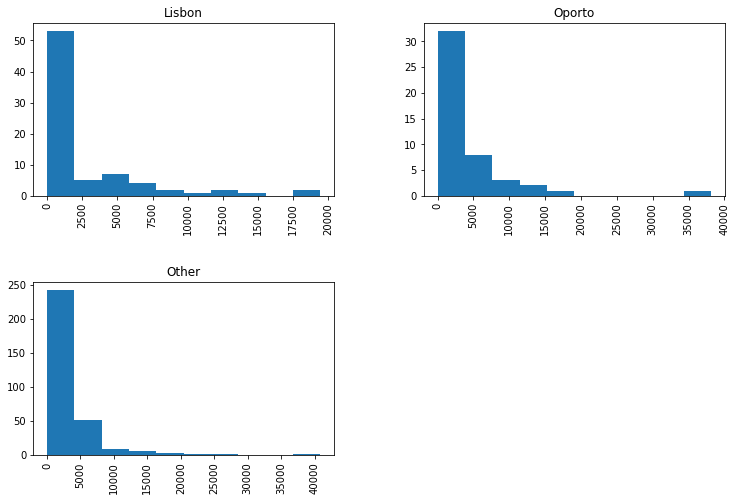

In [84]:
df.hist(by='Region',column = 'Detergents_Paper',figsize=(12,8))

array([<AxesSubplot:title={'center':'Hotel'}>,
       <AxesSubplot:title={'center':'Retail'}>], dtype=object)

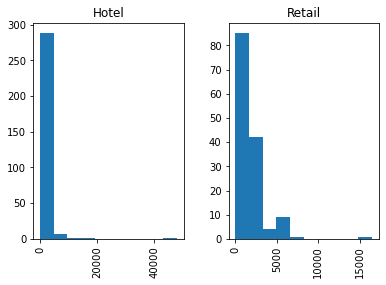

In [85]:
df.hist(by='Channel',column = 'Delicatessen')

array([[<AxesSubplot:title={'center':'Lisbon'}>,
        <AxesSubplot:title={'center':'Oporto'}>],
       [<AxesSubplot:title={'center':'Other'}>, <AxesSubplot:>]],
      dtype=object)

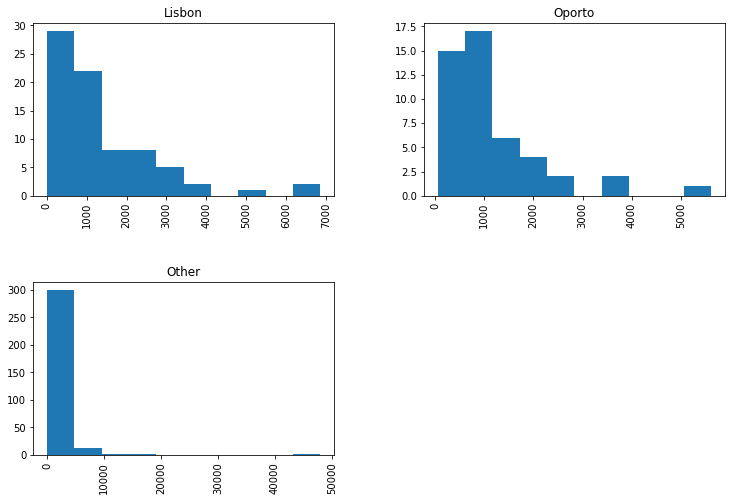

In [86]:
df.hist(by='Region',column = 'Delicatessen', figsize=(12,8))

In [87]:

corr = dfcopy.corr()
corr


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Expenditure
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.575178
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.776909
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.740680
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.388436
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.633882
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.496849
Total Expenditure,0.575178,0.776909,0.740680,0.388436,0.633882,0.496849,1.000000


<AxesSubplot:>

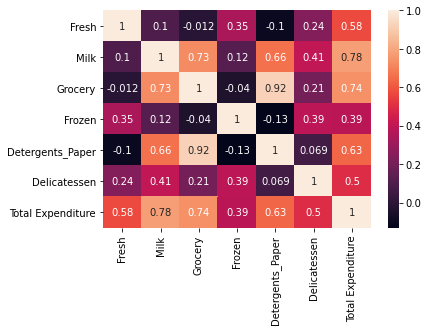

In [88]:
sns.heatmap(corr, annot=True)


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Detergents_Paper', ylabel='Grocery'>

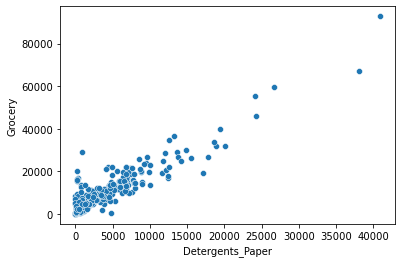

In [89]:
sns.scatterplot(df['Detergents_Paper'], df['Grocery'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

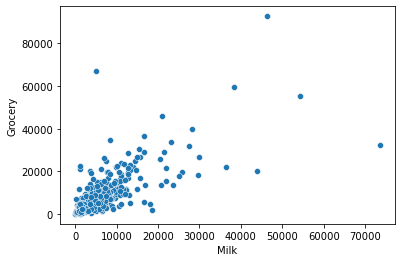

In [90]:
sns.scatterplot(df['Milk'], df['Grocery'])

In [91]:
#Problem 2
#The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate
#students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 
#undergraduates (stored in the Survey data set).

import scipy.stats as stats
sns.set()

In [92]:
df1 = pd.read_csv('Survey-1.csv')
df1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [93]:
df1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [94]:
df1.shape

(62, 14)

In [95]:
df1.size

868

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [97]:
pd.crosstab(df1['Gender'],df1['Major'], margins = True )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [98]:
pd.crosstab(df1['Gender'],df1['Grad Intention'], margins = True )

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [99]:
pd.crosstab(df1['Gender'],df1['Employment'], margins = True )

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [100]:
pd.crosstab(df1['Gender'],df1['Computer'], margins = True )

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [101]:
print('The probability that a randomly selected CMSU student will be male is', round(29/62,3))

The probability that a randomly selected CMSU student will be male is 0.468


In [102]:
print('The probability that a randomly selected CMSU student will be female is', round(33/62,3))

The probability that a randomly selected CMSU student will be female is 0.532


In [103]:
print('The probability that a randomly selected male student will be an accounting major  is', round(4/29,3))

The probability that a randomly selected male student will be an accounting major  is 0.138


In [104]:
print('The probability that a randomly selected male student will be a CIS major  is', round(1/29,3))

The probability that a randomly selected male student will be a CIS major  is 0.034


In [105]:
print('The probability that a randomly selected male student will be an Economics/Finance major  is', round(4/29,3))

The probability that a randomly selected male student will be an Economics/Finance major  is 0.138


In [106]:
print('The probability that a randomly selected male student will be a International Business major  is', round(2/29,3))

The probability that a randomly selected male student will be a International Business major  is 0.069


In [107]:
print('The probability that a randomly selected male student will be a Management major  is', round(6/29,3))

The probability that a randomly selected male student will be a Management major  is 0.207


In [108]:
print('The probability that a randomly selected male student will be a Other major  is', round(4/29,3))

The probability that a randomly selected male student will be a Other major  is 0.138


In [109]:
print('The probability that a randomly selected male student will be a Retailing/Marketing major  is', round(5/29,3))

The probability that a randomly selected male student will be a Retailing/Marketing major  is 0.172


In [110]:
print('The probability that a randomly selected male student will be  Undecided   is', round(3/29,3))

The probability that a randomly selected male student will be  Undecided   is 0.103


In [111]:
print('The probability that a randomly selected female student will be an accounting major  is', round(3/33,3))

The probability that a randomly selected female student will be an accounting major  is 0.091


In [112]:
print('The probability that a randomly selected female student will be a CIS major  is', round(3/33,3))

The probability that a randomly selected female student will be a CIS major  is 0.091


In [113]:
df2 = pd.crosstab(df1['Gender'],df1['Grad Intention'])
df2


Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [114]:
df3 = df2.drop('Undecided',axis=1)
df3

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [115]:
 #2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
(df1['GPA'] < 3).sum()


17

In [116]:
#2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

dfcopy = df1.copy()
dfcopy.query('Gender =="Male" and Salary >= 50', inplace = True) 
dfcopy
  

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
21,22,Male,18,Sophomore,Accounting,Undecided,3.0,Unemployed,60.0,1,4,600,Laptop,500
25,26,Male,24,Senior,Management,Yes,3.3,Full-Time,60.0,0,1,300,Laptop,40
26,27,Male,20,Junior,Economics/Finance,Yes,3.1,Full-Time,65.0,1,5,375,Laptop,300
28,29,Male,22,Senior,Retailing/Marketing,Yes,3.3,Part-Time,55.0,1,6,1100,Laptop,60
30,31,Male,20,Junior,Accounting,Undecided,3.4,Part-Time,55.0,2,3,500,Laptop,750
38,39,Male,24,Junior,Economics/Finance,Yes,2.8,Part-Time,50.0,1,6,600,Laptop,50
39,40,Male,19,Sophomore,Retailing/Marketing,Yes,2.5,Unemployed,50.0,2,5,300,Laptop,100


In [117]:
dfcopy.shape

(14, 14)

In [118]:
# Find conditional probability that a randomly selected female earns 50 or more.

dfcopy1 = df1.copy()
dfcopy1.query('Gender =="Female" and Salary >= 50', inplace = True) 
dfcopy1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
20,21,Female,22,Junior,Retailing/Marketing,Undecided,3.2,Part-Time,55.0,1,3,690,Laptop,50
22,23,Female,22,Senior,Retailing/Marketing,Undecided,3.0,Part-Time,55.0,0,4,300,Laptop,35
24,25,Female,20,Junior,Economics/Finance,Yes,3.0,Part-Time,55.0,1,3,600,Laptop,300


In [119]:
dfcopy1.shape

(18, 14)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GPA', ylabel='Density'>

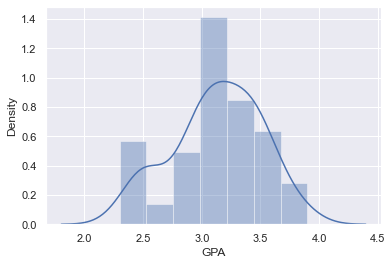

In [120]:
#2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages.
#For each of them comment whether they follow a normal distribution.
sns.distplot(df1['GPA'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

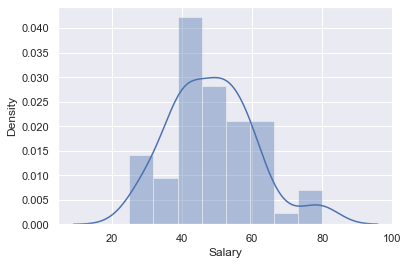

In [121]:
sns.distplot(df1['Salary'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending', ylabel='Density'>

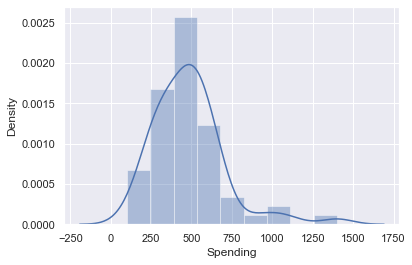

In [122]:
sns.distplot(df1['Spending'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

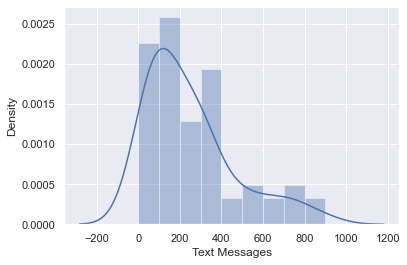

In [123]:
sns.distplot(df1['Text Messages'])

In [124]:
# Shapiro-Wilk Test to check normality of GPA
#H0-the population is normal 
#H1- the population is not normal 
#alpha = 0.05, if p value <alpha  reject the null hypothesis,
# if p value > alpha  cannot reject(accept) the null hypothesis

shapiro_test = stats.shapiro(df1['GPA'])
shapiro_test



ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

In [125]:
# Shapiro-Wilk Test to check normality of Salary

shapiro_test = stats.shapiro(df1['Salary'])
shapiro_test



ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

In [126]:
# Shapiro-Wilk Test to check normality of Spending
shapiro_test = stats.shapiro(df1['Spending'])
shapiro_test


ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

In [127]:
# Shapiro-Wilk Test to check normality of Text Messages
shapiro_test = stats.shapiro(df1['Text Messages'])
shapiro_test

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

In [128]:
df1.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [129]:
df2 = pd.read_csv('A & B shingles-1.csv')
df2.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [130]:
#3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits?
#State your conclusions clearly showing all steps.

# We take alpha = 0.05

print("The sample size for A shingles is",len(df2['A']))

The sample size for A shingles is 36


In [131]:
# one sample t-test
# null hypothesis: Mu = 0.35
t_statistic, p_value = ttest_1samp(df2['A'], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '. format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [132]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value/2 < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value/2)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.07477633144907513


In [133]:
df2copy = df2.copy()
df2copy = df2copy.drop('A',axis=1)
df2copy
df2copy.dropna
df2copy

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37
5,0.18
6,0.42
7,0.58
8,0.25
9,0.41


In [134]:
t_statistic, p_value = ttest_1samp(df2copy['B'][0:31], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '. format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191813 


In [135]:
# p_value < 0.05 => alternative hypothesis:
# p_value > 0.05 => Null hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value/2 < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value/2)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.0020904774003191813


In [136]:
#3.2 Do you think that the population means for shingles A and B are equal?
#Form the hypothesis and conduct the test of the hypothesis.
#What assumption do you need to check before the test for equality of means is performed?

t_statistic, p_value  = ttest_ind(df2['A'],df2['B'][0:31])
print('tstat',t_statistic)    
print('P Value',p_value) 

tstat 1.289628271966112
P Value 0.2017496571835328


In [137]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the means of both A Shingles and B Shingles are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the means of both A Shingles and B Shingles are the same.')

two-sample t-test p-value= 0.2017496571835328
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the means of both A Shingles and B Shingles are the same.
